<a href="https://colab.research.google.com/github/deathvadeR-afk/mini_Deep_Learning_projects/blob/main/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-on 2

In [8]:
import tensorflow as tf
import nltk
import gensim
from gensim.models import Word2Vec
import re

# Load and preprocess the "Alice in Wonderland" text
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize, sent_tokenize


path_to_file = tf.keras.utils.get_file('alice.txt', 'https://www.gutenberg.org/files/11/11-0.txt')
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# Clean and tokenize the text
text = re.sub(r'[^a-zA-Z\s]', '', text.lower())  # Remove special characters and lowercase
sentences = sent_tokenize(text)  # Sentence tokenization

# Word tokenization
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

# Display some tokenized sentences
print(tokenized_sentences[:2])

[['start', 'of', 'the', 'project', 'gutenberg', 'ebook', 'illustration', 'alices', 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', 'the', 'millennium', 'fulcrum', 'edition', 'contents', 'chapter', 'i', 'down', 'the', 'rabbithole', 'chapter', 'ii', 'the', 'pool', 'of', 'tears', 'chapter', 'iii', 'a', 'caucusrace', 'and', 'a', 'long', 'tale', 'chapter', 'iv', 'the', 'rabbit', 'sends', 'in', 'a', 'little', 'bill', 'chapter', 'v', 'advice', 'from', 'a', 'caterpillar', 'chapter', 'vi', 'pig', 'and', 'pepper', 'chapter', 'vii', 'a', 'mad', 'teaparty', 'chapter', 'viii', 'the', 'queens', 'croquetground', 'chapter', 'ix', 'the', 'mock', 'turtles', 'story', 'chapter', 'x', 'the', 'lobster', 'quadrille', 'chapter', 'xi', 'who', 'stole', 'the', 'tarts', 'chapter', 'xii', 'alices', 'evidence', 'chapter', 'i', 'down', 'the', 'rabbithole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', 'and', 'of', 'having', 'nothin

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [9]:
# Training the Word2Vec model
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=2, workers=4, sg=1)

In [10]:
# Save the model
model.save("word2vec_model.model")

In [11]:
# Load the model
model = Word2Vec.load("word2vec_model.model")

# Explore word vectors
vector = model.wv['alice']  # Get vector for "alice"
print(vector)

# Find similar words
similar_words = model.wv.most_similar('alice', topn=5)
print(similar_words)

[-0.09660634  0.24169879 -0.13923714 -0.05631355 -0.01404472 -0.39115116
  0.02556081  0.4267293  -0.10239425 -0.05857058  0.00221008 -0.21390857
 -0.08197156  0.0392709   0.0732621  -0.07853197  0.00344601 -0.2210174
 -0.09204363 -0.34883925  0.13851975 -0.14400867  0.24609989  0.12021248
 -0.22418126  0.01251124 -0.13276474  0.08367842 -0.3165462  -0.0069022
  0.24404058 -0.04218418  0.08713376 -0.142299   -0.04369486  0.20262802
  0.05974093 -0.00234124 -0.15717663 -0.19909428  0.04659396 -0.16449638
 -0.08425274 -0.08301369  0.01793522 -0.10343668  0.06487284 -0.03305178
  0.16232768  0.15115231  0.07246146 -0.24440475 -0.03369943 -0.00454603
 -0.18726401  0.05175706  0.10064648 -0.13951512 -0.14662269 -0.06465667
  0.03893916 -0.09904532  0.05688918 -0.0140855  -0.1964251   0.27353084
  0.19511323  0.23329788 -0.27762368  0.29278898 -0.12277731  0.05997045
  0.20165716 -0.07960239  0.14563054  0.16254906  0.09575299  0.12239804
 -0.13820145  0.01383083 -0.16414902  0.09197158 -0.0

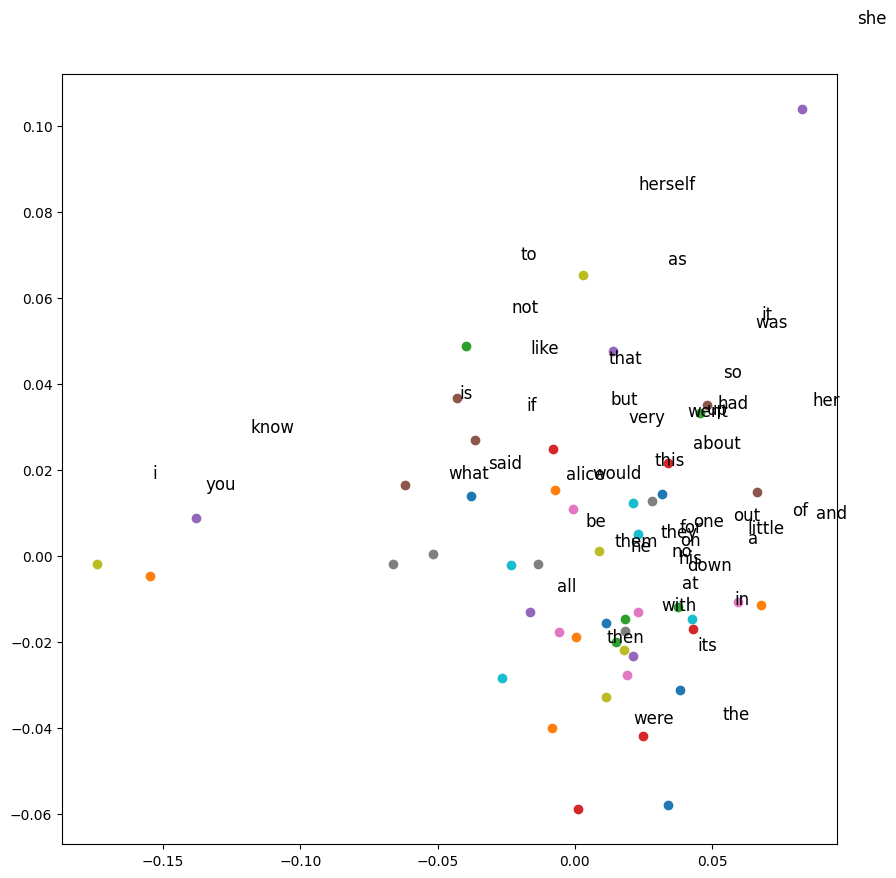

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality of word vectors
pca = PCA(n_components=2)
words = list(model.wv.index_to_key)[:50]  # Take the first 50 words
word_vectors = [model.wv[word] for word in words]
reduced_vectors = pca.fit_transform(word_vectors)

# Plotting
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=12)
plt.show()

In [3]:
%pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
opencv-python-h